<a href="https://colab.research.google.com/github/pabloac31/TFG/blob/master/ImageNet_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone the repository**

In [1]:
! git clone https://github.com/pabloac31/TFG.git
%cd TFG

Cloning into 'TFG'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 299 (delta 68), reused 29 (delta 15), pack-reused 183
Receiving objects: 100% (299/299), 219.46 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Checking out files: 100% (31/31), done.
/content/TFG


**Using TensorFlowV1**

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


**Import libraries**

In [3]:
from utils import *
from adversarial_attacks import *
import torchvision.models as models
import json

**Use CUDA if available**

In [4]:
# Define what device we are using
use_cuda=True
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


**Get the names of ImageNet classes**

In [5]:
with open('imagenet_class_index.json') as f:
  class_idx = json.load(f)

In [ ]:
model = models.resnet50(pretrained=True)
#model = models.densenet169(pretrained=True)
#model = models.mobilenet_v2(pretrained=True)
#model = torch.hub.load('pytorch/vision:v0.6.0', 'inception_v3', pretrained=True)

In [ ]:
img = torch.unsqueeze(image_loader('https://images.freeimages.com/images/large-previews/4ec/banana-s-1326714.jpg'), dim=0)
img = img.to(device)

In [ ]:
model.eval()
model = model.to(device)
img.requires_grad = True

output = model(img)
pred = output.max(1, keepdim=True)[1]
print('Input image classified as', class_idx[str(pred.item())][1], end='')
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(' with a {:.2f}% confidence'.format(percentage[pred].item()))

Input image classified as banana with a 99.53% confidence


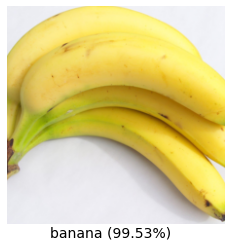

In [ ]:
f = plt.figure()
plt.axis('off')
#f.text(.50, .08, class_idx[str(pred.item())][1] + ' [99,93,99,100]%', ha='center', fontsize=14)
f.text(.50, .08, class_idx[str(pred.item())][1] + ' ({:.2f}%)'.format(percentage[pred].item()), ha='center', fontsize=14)
plt.imshow(displayable(img.clone().detach().cpu(), dataset='imagenet'))

In [ ]:
lb, ub =  valid_bounds(img, 255, dataset='imagenet')
lb = lb[None, :, :, :].to(device)
ub = ub[None, :, :, :].to(device)
adv_x, pert_x, n_iter = sparsefool(model, device, img, pred.item(), lb, ub, max_iter=50)
#adv_x, n_iter, scores = one_pixel_attack(model, device, img, pred.item(), pop_size=1000, d=1000, dataset='imagenet')
#adv_x, _ = fgsm(model, img, pred[0], output, epsilon=0.64, clip=False, dataset='imagenet')
#_, adv_x, _, n_iter = deepfool(model, device, img, num_classes=100, lambda_fac=1.02, p=np.inf, dataset='imagenet')

In [ ]:
output = model(adv_x)
pred = output.max(1, keepdim=True)[1]
print('Adversarial image classified as', class_idx[str(pred.item())][1], end='')
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(' with a {:.2f}% confidence'.format(percentage[pred].item()))

Adversarial image classified as slug with a 40.60% confidence


Text(0.5, 0.08, 'slug (40.60%)')

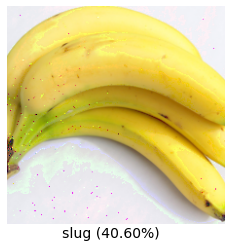

In [ ]:
f = plt.figure()
plt.axis('off')
plt.imshow(displayable(adv_x.clone().detach().cpu(), dataset='imagenet'))
f.text(.50, .08, class_idx[str(pred.item())][1] + ' ({:.2f}%)'.format(percentage[pred].item()), ha='center', fontsize=14)

In [ ]:
#k = (abs(img-adv_x)).max().item()
k = 0.1
rnd_img = img + k*torch.randn_like(img)
output = model(rnd_img)
pred = output.max(1, keepdim=True)[1]
print('Noisy image classified as', class_idx[str(pred.item())][1], end='')
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(' with a {:.2f}% confidence'.format(percentage[pred].item()))

Noisy image classified as monarch with a 99.96% confidence


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


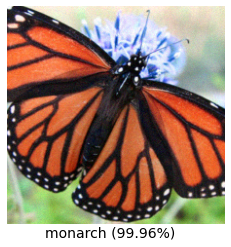

In [ ]:
f = plt.figure()
plt.axis('off')
f.text(.50, .08, class_idx[str(pred.item())][1] + ' ({:.2f}%)'.format(percentage[pred].item()), ha='center', fontsize=14)
plt.imshow(displayable(rnd_img.clone().detach().cpu(), dataset='imagenet'))

Initial adv distance 86.5709
Initial rnd distance 38.7658

Block 0
Input size:  torch.Size([1, 3, 224, 224])
Output size:  torch.Size([1, 64, 112, 112])

Avg adv distance 41.7909
Avg rnd distance 15.3435

Max adv distance 76.9852
Max rnd distance 27.5597


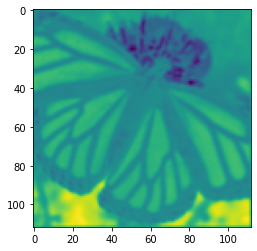

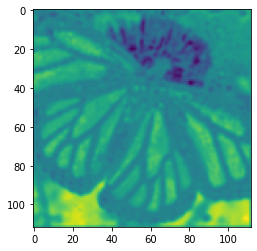

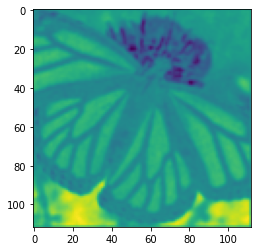


Block 1
Input size:  torch.Size([1, 64, 112, 112])
Output size:  torch.Size([1, 64, 112, 112])

Avg adv distance 10.5230
Avg rnd distance 4.1012

Max adv distance 39.1378
Max rnd distance 17.4537


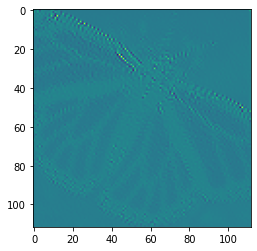

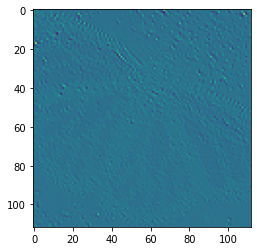

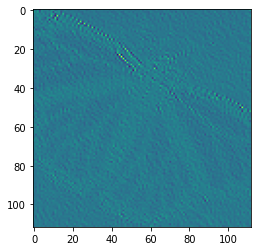


Block 2
Input size:  torch.Size([1, 64, 112, 112])
Output size:  torch.Size([1, 64, 112, 112])

Avg adv distance 8.5929
Avg rnd distance 3.7301

Max adv distance 31.7013
Max rnd distance 16.0029


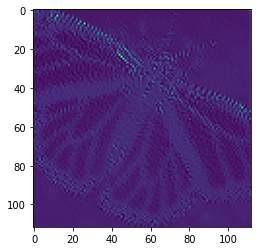

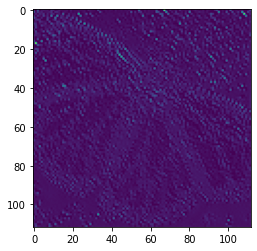

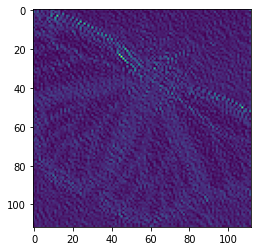


Block 3
Input size:  torch.Size([1, 64, 112, 112])
Output size:  torch.Size([1, 64, 56, 56])

Avg adv distance 7.1260
Avg rnd distance 2.0514

Max adv distance 35.9258
Max rnd distance 9.9066


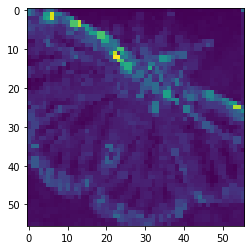

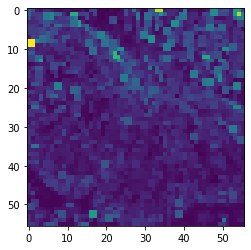

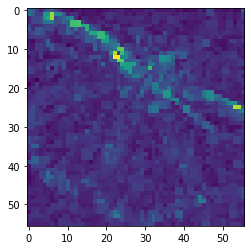


Block 4
Input size:  torch.Size([1, 64, 56, 56])
Output size:  torch.Size([1, 256, 56, 56])

Avg adv distance 6.5464
Avg rnd distance 3.2372

Max adv distance 19.1282
Max rnd distance 9.8323


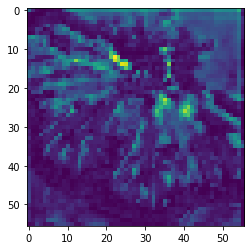

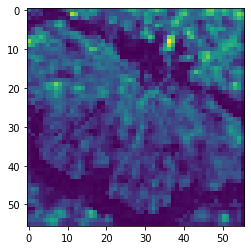

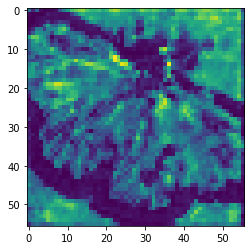


Block 5
Input size:  torch.Size([1, 256, 56, 56])
Output size:  torch.Size([1, 512, 28, 28])

Avg adv distance 3.3441
Avg rnd distance 1.7417

Max adv distance 13.9598
Max rnd distance 6.0706


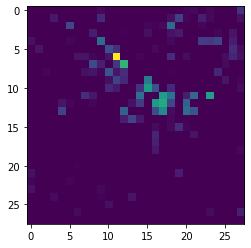

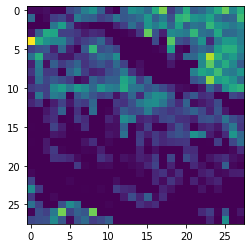

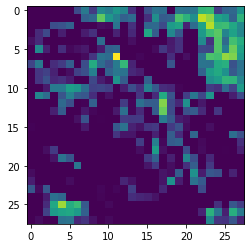


Block 6
Input size:  torch.Size([1, 512, 28, 28])
Output size:  torch.Size([1, 1024, 14, 14])

Avg adv distance 1.1219
Avg rnd distance 0.5936

Max adv distance 5.7140
Max rnd distance 3.1341


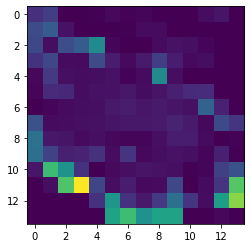

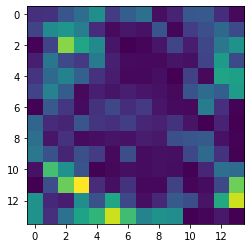

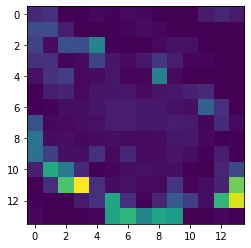


Block 7
Input size:  torch.Size([1, 1024, 14, 14])
Output size:  torch.Size([1, 2048, 7, 7])

Avg adv distance 3.4852
Avg rnd distance 1.4427

Max adv distance 16.5059
Max rnd distance 8.0564


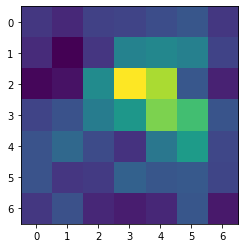

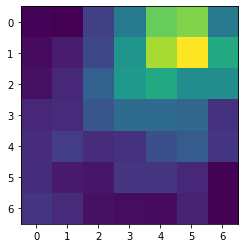

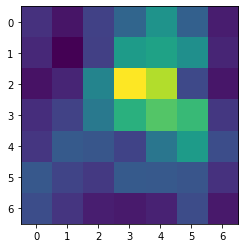


Block 8
Input size:  torch.Size([1, 2048, 7, 7])
Output size:  torch.Size([1, 2048, 1, 1])

Avg adv distance 0.1940
Avg rnd distance 0.0590

Max adv distance 1.7319
Max rnd distance 0.7260


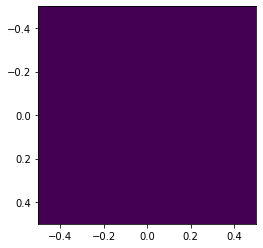

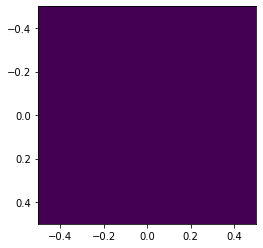

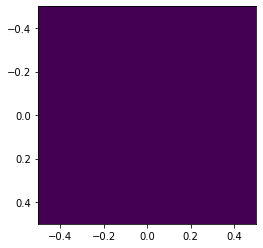

In [ ]:
x = img.clone()
adv = adv_x.clone()
rnd = rnd_img.clone()
print("Initial adv distance {:.4f}".format((x-adv).norm().item()))
print("Initial rnd distance {:.4f}".format((x-rnd).norm().item()))

#for i, l in enumerate(model._modules['features']):
for i, l in enumerate(list(model.children())[:-1]):
  print("\nBlock",i)
  #print("\n", l, "\n")
  print("Input size: ", x.size())
  x = l(x)
  adv = l(adv)
  rnd = l(rnd)
  print("Output size: ", x.size())


  dist_adv = 0
  dist_rnd = 0
  max_adv = 0
  max_rnd = 0

  j = 0
  max_adv_idx, max_rnd_idx = 0, 0

  for d_x, d_adv, d_rnd in zip(x[0], adv[0], rnd[0]):
    norm_adv = (d_x - d_adv).norm().item()
    norm_rnd = (d_x - d_rnd).norm().item()
    dist_adv += norm_adv
    dist_rnd += norm_rnd
    if norm_adv > max_adv:
      max_adv = norm_adv
      max_adv_idx = j
    if norm_rnd > max_rnd:
      max_rnd = norm_rnd
      max_rnd_idx = j

    j += 1


  print("\nAvg adv distance {:.4f}".format(dist_adv / x.size(1)))
  print("Avg rnd distance {:.4f}".format(dist_rnd / x.size(1)))

  print("\nMax adv distance {:.4f}".format(max_adv))
  print("Max rnd distance {:.4f}".format(max_rnd))

  plt.imshow(x[0][max_adv_idx].clone().detach().cpu())
  plt.show()
  plt.imshow(adv[0][max_adv_idx].clone().detach().cpu())
  plt.show()
  plt.imshow(rnd[0][max_adv_idx].clone().detach().cpu())
  plt.show()